* bayesian modeling by pymc3

In [5]:
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import pymc3 as pm

In [6]:
# create sample data

n = 10
train_x = []
train_y = []

for i in range(n):
    x = round(np.random.rand()*4+3, 1) # random 3.0 ~ 7.0
    mu = np.exp(1.5+0.1*x) # poisson's mu
    y = np.random.poisson(mu) # poisson
    train_x.append(x)
    train_y.append(y)
    
train_x, train_y

([4.1, 6.5, 5.8, 5.0, 4.5, 6.2, 3.6, 6.3, 3.6, 5.4],
 [3, 12, 11, 7, 10, 10, 8, 11, 10, 8])

logp = -136.76, ||grad|| = 429.91: 100%|██████████| 10/10 [00:00<00:00, 310.89it/s]
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta2, beta1]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:01<00:00, 1675.36draws/s]


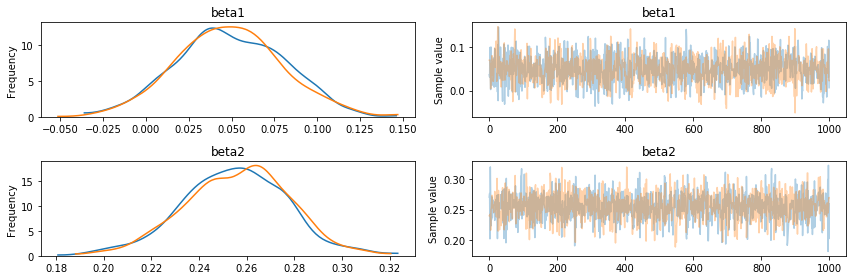

In [7]:
with pm.Model() as model:

    beta1 = pm.Normal('beta1', mu=0, tau=1000)
    beta2 = pm.Normal('beta2', mu=0, tau=1000)
    mu = np.exp(beta1+beta2*train_x)
    y = pm.Poisson('y', mu=mu, observed=train_y)
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(1000, step, start=start)
    pm.summary(trace)
    pm.traceplot(trace)

In [8]:
!python --version

Python 3.6.6 :: Anaconda custom (64-bit)


In [9]:
!pip freeze

absl-py==0.2.2
alabaster==0.7.10
algopy==0.5.7
altair==2.1.0
anaconda-client==1.6.5
anaconda-navigator==1.6.9
anaconda-project==0.8.0
annoy==1.12.0
appdirs==1.4.3
arrow==0.12.1
asn1crypto==0.22.0
astor==0.7.1
astroid==1.5.3
astropy==2.0.2
attrs==18.1.0
audioread==2.1.6
Babel==2.5.0
backports.shutil-get-terminal-size==1.0.0
Baker==1.3
basemap==1.1.0
bayesian-optimization==0.6.0
bayespy==0.5.17
bcolz==1.2.1
beautifulsoup4==4.6.0
biopython==1.72
bitarray==0.8.1
bkcharts==0.2
blaze==0.11.3
bleach==1.5.0
blist==1.3.6
bokeh==0.13.0
Boruta==0.1.5
boto==2.48.0
boto3==1.7.54
botocore==1.10.54
Bottleneck==1.2.1
-e git+https://github.com/SohierDane/BigQuery_Helper@8615a7f6c1663e7f2d48aa2b32c2dbcb600a440f#egg=bq_helper
branca==0.3.0
bz2file==0.98
cachetools==2.1.0
cairocffi==0.8.1
CairoSVG==2.1.3
Cartopy==0.16.0
catboost==0.9.1.1
category-encoders==1.2.8
certifi==2018.4.16
cffi==1.10.0
chainer==4.2.0
chardet==3.0.4
click==6.7
click-plugins==1.0.3
cligj==0.4.0
cloudpickle==0.4.0
clyent==1.2.2
cmudi